# (Fordgo bike data exploration)
## by (Hager Sayed)


This document explores a dataset containing the trip data of the fordgo bike.


In [ ]:
## Preliminary Wrangling

In [3]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime 
import calendar 

%matplotlib inline

In [8]:
df1 = df.copy()

In [9]:
df1.drop(columns=['end_station_id','end_station_name','start_station_name','start_station_id'],inplace=True)

In [10]:
df1.dropna(subset=['member_birth_year', 'member_gender'],inplace=True)

In [12]:
df1['member_age'] = 2018-df1['member_birth_year'].astype('int')
df1.drop(columns='member_birth_year',inplace=True)
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44
5,1793,2019-02-28 23:49:58.6320,2019-03-01 00:19:51.7600,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59


In [13]:
df1['duration_min']=df1['duration_sec']/60
df1['duration_hours']=df1['duration_min']/60

In [14]:
#changing member_gender and user type to catagorical variables
df1.member_gender=df1.member_gender.astype('category')
df1.user_type=df1.user_type.astype('category')
# changing start and end data to date format
df1.start_time=pd.to_datetime(df1['start_time'])
df1.end_time=pd.to_datetime(df1['end_time'])
df1.head()

,duration_sec,start_time,end_time,start_station_latitude,start_station_longitude,end_station_latitude,end_station_longitude,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,duration_min,duration_hours
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,37.789625,-122.400811,37.794231,-122.402923,4902,Customer,Male,No,34,869.750000,14.495833
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,37.769305,-122.426826,37.786375,-122.404904,5905,Customer,Male,No,46,1030.900000,17.181667
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,37.774836,-122.446546,37.773311,-122.444293,6638,Subscriber,Other,No,29,608.166667,10.136111
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,37.804562,-122.271738,37.792714,-122.248780,4898,Subscriber,Male,Yes,44,26.416667,0.440278
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,37.770407,-122.391198,37.798014,-122.405950,5200,Subscriber,Male,No,59,29.883333,0.498056


In [16]:
df1['start_time_month']=df1['start_time'].dt.strftime('%B')
df1['start_time_weekday']=df1['start_time'].dt.strftime('%a')

In [17]:
df1.start_time_month= df1.start_time_month.astype('category')
df1.start_time_weekday = df1.start_time_weekday.astype('category')
df1.head()

February    175147
Name: start_time_month, dtype: int64

In [21]:
df_age_abnormal = df1[df1['member_age'] > 90]
df1 = df1.drop(df_age_abnormal.index, axis=0)

## Univariate Exploration


the distribution of members gender using piecharts

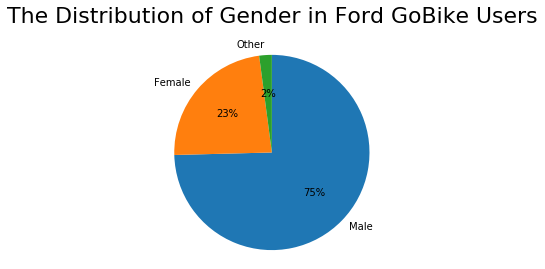

In [63]:
sorted_counts = df1['member_gender'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of Gender in Ford GoBike Users", fontsize=22, y=1.07)
plt.axis('square');

the percentage of male users is the hieghest as 75% of users are males,23% are females and 2% are others

now we will see the distribution of user types

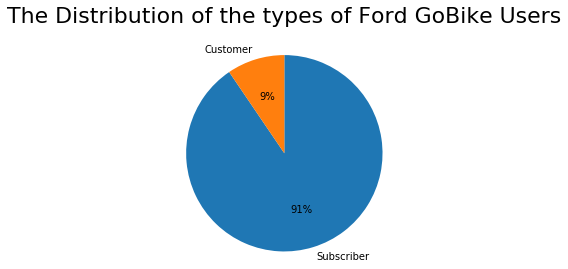

In [69]:
sorted_counts = df1['user_type'].value_counts()
plt.pie(sorted_counts, labels = sorted_counts.index, autopct='%1.0f%%', startangle=90, counterclock = False)
plt.title("The Distribution of the types of Ford GoBike Users", fontsize=22, y=1.07)
plt.axis('square');

from the previous plots the majority of the users are subscribers (91% of users are subscribers and 9% customers)

now we will see the distribution of tha ages of the users

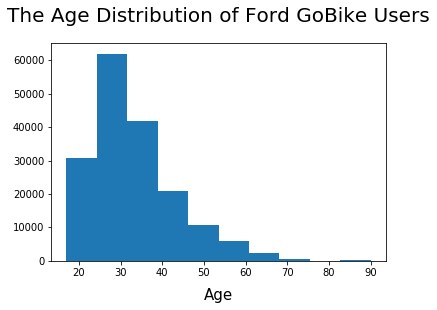

In [35]:
plt.hist(data=df1,x='member_age',color=base_color)
plt.title("The Age Distribution of Ford GoBike Users", fontsize=20,y=1.07)
plt.xlabel("Age", fontsize=15, labelpad=10);

In [36]:
df1.member_age.mean()

33.157336166469605

the mean age of the members is 33 years old and number of members decreases as age goes higher

now we will the distribution of the trips duaration in minutes

(0, 100)

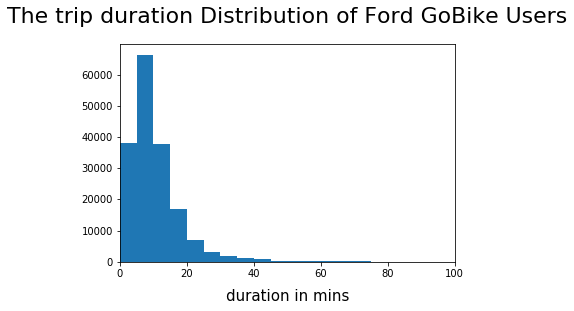

In [72]:
bins = np.arange(0,df1.duration_min.max()+5,5)
plt.hist(data=df1,x='duration_min',color=base_color,bins = bins)
plt.title("The trip duration Distribution of Ford GoBike Users", fontsize=22,y=1.07)
plt.xlabel("duration in mins", fontsize=15, labelpad=10);
plt.xlim((0,100))

from the duaration distribution the majority of the ride are less than 20 minutes and as the duration increases the number of users decreases

## Bivariate Exploration


(0, 200)

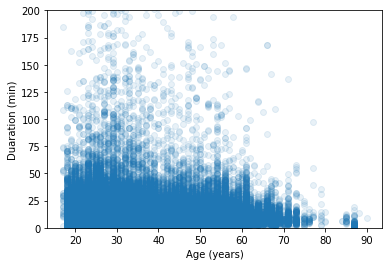

In [100]:
plt.scatter(data=df1,x='member_age',y='duration_min',alpha = 1/10);
plt.xlabel('Age (years)')
plt.ylabel('Duaration (min)')
plt.ylim((0,200))

from the scatter plot most users of different ages ride less than 50 minutes  Higher durations are clocked by younger members. 


studying the  usage of different types of customers during the week


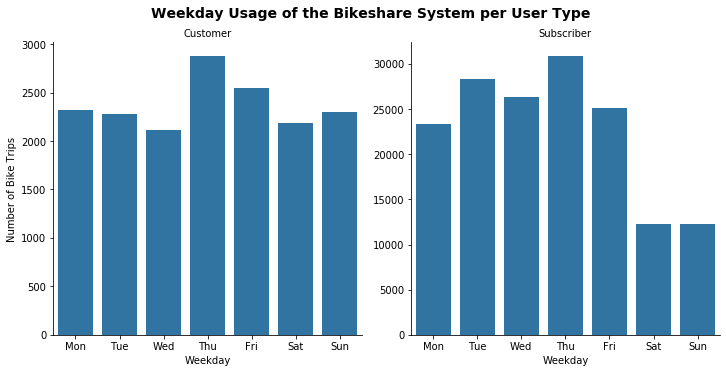

In [39]:
base_color= sb.color_palette()[0]
cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df1, x='start_time_weekday', col="user_type", kind='count', sharey = False, order = cat_order, color = base_color)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type', y=1.03, fontsize=14, fontweight='semibold');


both customers and users use the bikes the most on thursday but on saturday and sunday subscribers usage rate is much less than 
users but for most of the remaining days there is no much difference

the relationship between user_type and duration

(0, 200)

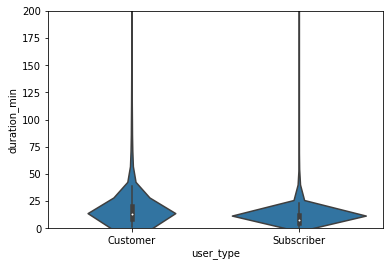

In [56]:
base_color = sb.color_palette()[0]
sb.violinplot(data = df1, x = 'user_type', y = 'duration_min',color = base_color)
plt.ylim((0,200))
# plt.xticks(rotation = 15)

from the violin plot  a larger percentage of customers are taking longer rides duration compared to subscripers 

## Multivariate Exploration

the relationship between member age , gender and the duarion of the trip

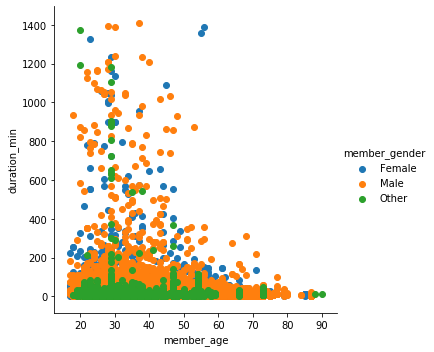

In [47]:
g =sb.FacetGrid(data =df1,hue = 'member_gender',size = 5)
g.map(plt.scatter,'member_age','duration_min')
g.add_legend()

from the scatter plot we can tell that higher duration are occupied by ages mostly less than 60 and there is no obvious effect on duration based on gender

analyzing the distributions between customer and subscriber, based on gender and weekday usage.

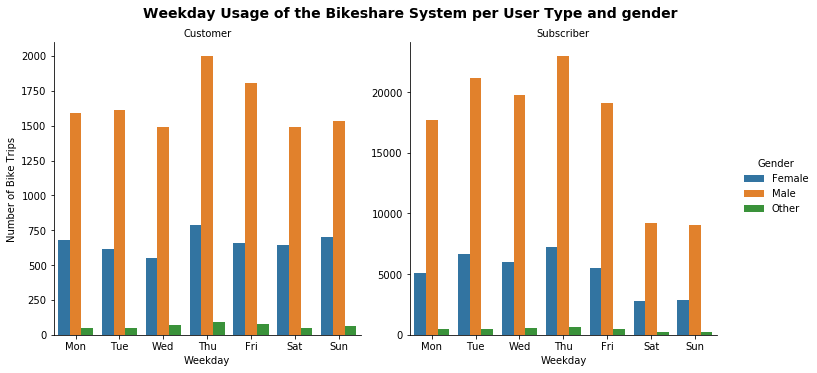

In [54]:

cat_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
g = sb.catplot(data=df1, x='start_time_weekday', col="user_type",hue='member_gender', kind='count', sharey = False, order = cat_order)
g.set_axis_labels("Weekday", "Number of Bike Trips")
g.set_titles("{col_name}")
g.fig.suptitle('Weekday Usage of the Bikeshare System per User Type and gender', y=1.03, fontsize=14, fontweight='semibold');
g._legend.set_title('Gender')

While there is less female and other gender usage than male as a natural result for the higher number of males in the program, the trend between customers and subscribers of each gender is similar. Customers of all genders use the service more often on the weekends, while subscribers use the system during the week.

in conclusion ,  regarding our feature of interest(user_type) most of our users are subscribers ,
The customers prefer to use the Bikeshare on weekends, and the subscribers use the service on weekdays,
customers take longer rides duaration than subscribers 
gender almost has no effect on the data compared to age and user_type

In [4]:
!jupyter nbconvert slide_deck_template.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck_template.ipynb to slides
[NbConvertApp] Writing 523828 bytes to slide_deck_template.slides.html
